Domain: Life Science, Agrophysics

Problem Statement: Inputs: We have a description of wheat kernals with a 7 dimensional measurement. These being: 

1. area (A)
2. perimeter(P), 
3. compactness (C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 

Learning/ Output: We will train a classification model to output the type of wheat variety from Kama, Rosa, and Canadian.

Metric: Because we have an even amount of data for each type of wheat variety (70 each), we will use the BIC and accuracy to assess the model performance.

Data Summary: n=210, p=7, 3 classes (70 in each), pairplots, distribution plots, .describe (summary statistics)

Solution Proposal: Logistic Regression from sklearn.linear_model import Logistic Regression.

Benchmark Model: guess all one type, using most_frequent with the DummyClassifier

Plan: get and load the data: handle headers and separators, visualize the data, run the benchmark.
Model Development: backwards selection using the BIC. Extra trees classifier. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

In [3]:
seeds_data = pd.read_csv(SEEDS_DATA_URL, sep="\s+", header=None)
seeds_data.columns = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'Asymmetry', 'GrooveLength'
                         , 'VarietyType']
seeds_data.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,Asymmetry,GrooveLength,VarietyType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


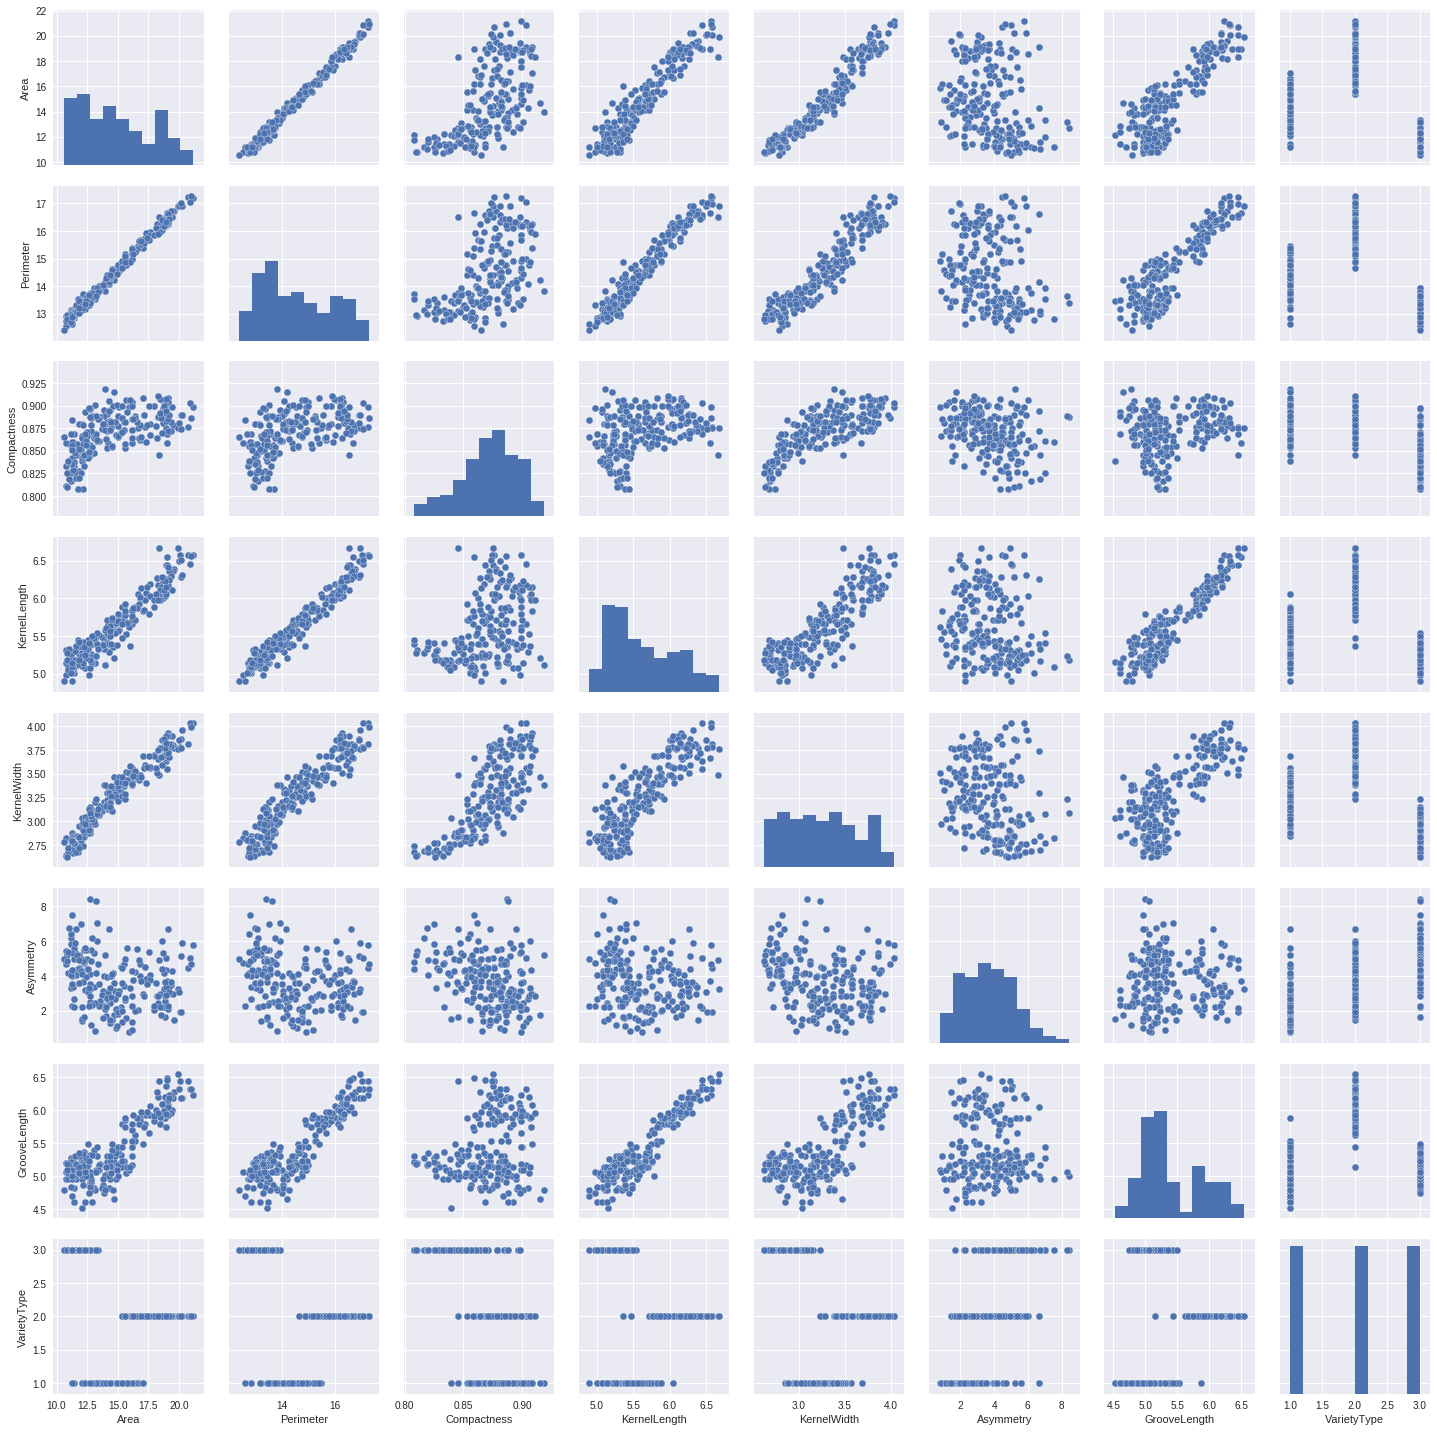

In [4]:
sns.pairplot(seeds_data)

In [5]:
seeds_melt = pd.melt(seeds_data.select_dtypes([float]))

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(3, 8)

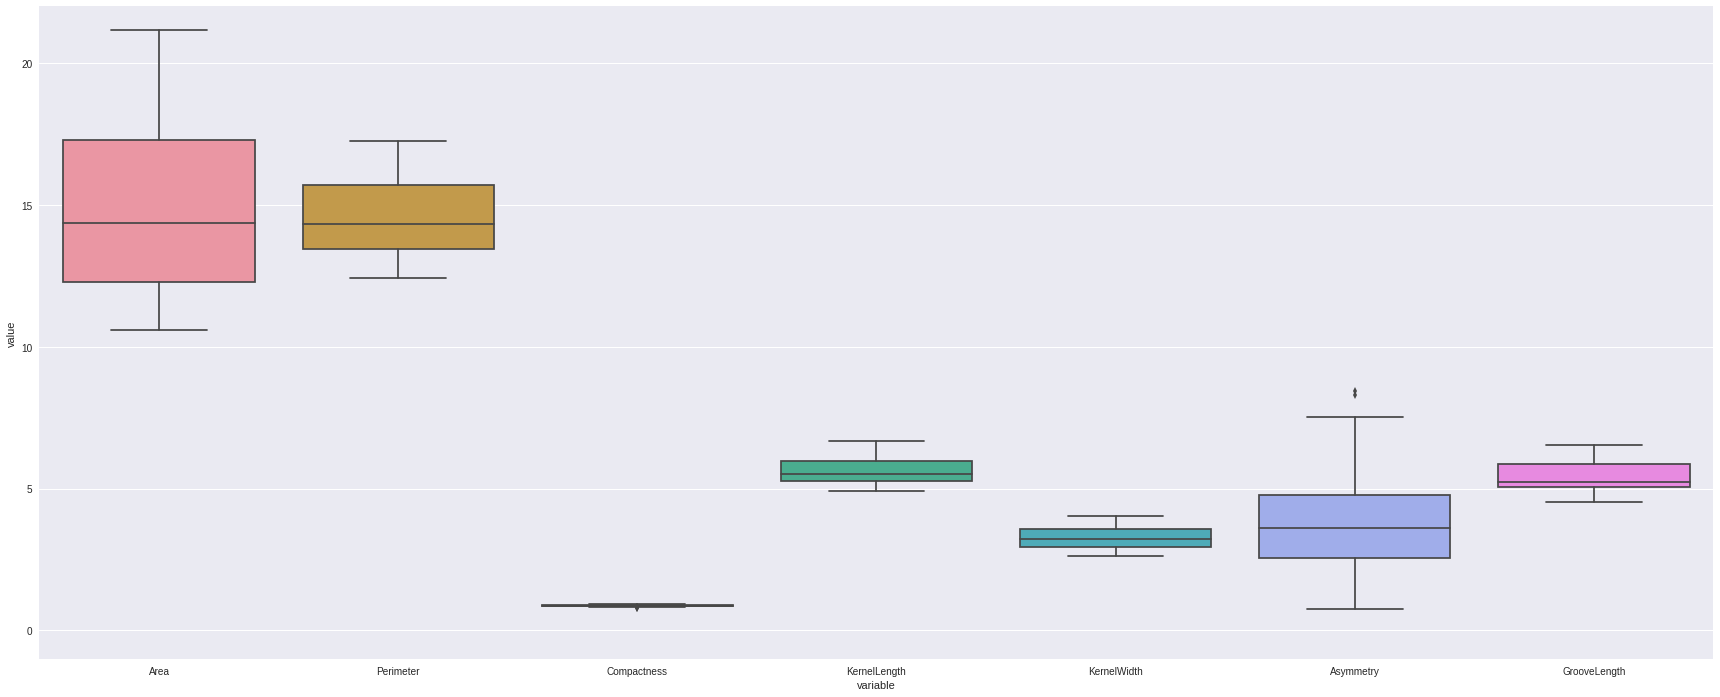

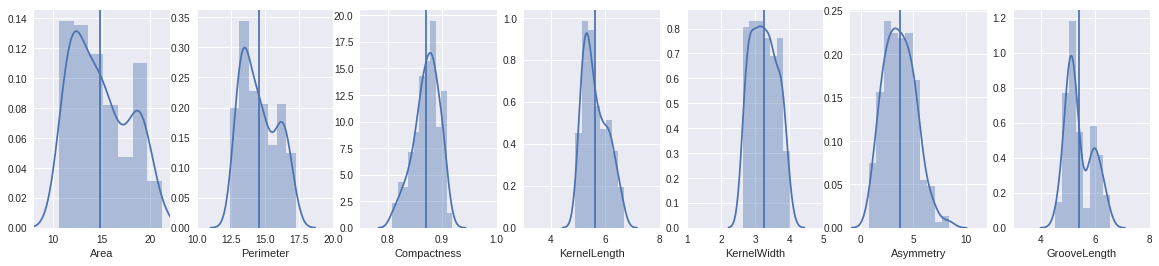

In [6]:
fig = plt.figure(figsize=(30,12))
sns.boxplot(x='variable', y='value', data=seeds_melt)
plt.ylim(-1,22)

_, ax = plt.subplots(1,7, figsize=(20,4))
seeds_numerical_data = seeds_data.select_dtypes([float])

for i, feat in enumerate(seeds_numerical_data.columns):
    sns.distplot(seeds_numerical_data[feat], ax=ax[i])
    ax[i].set_xlim(1,10)
    ax[i].axvline(seeds_numerical_data[feat].mean())

ax[0].set_xlim(8,22)
ax[1].set_xlim(10,20)
ax[2].set_xlim(.75,1)
ax[3].set_xlim(3,8)
ax[4].set_xlim(1,5)
ax[5].set_xlim(-1,12)
ax[6].set_xlim(3,8)

In [7]:
seeds_data.describe()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,Asymmetry,GrooveLength,VarietyType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from patsy import dmatrices
import math

In [10]:
features = seeds_data.drop('VarietyType', axis=1)
target = seeds_data['VarietyType']

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

In [12]:
dummy_cls = DummyClassifier(strategy= 'most_frequent') 
dummy_cls.fit(features_train, target_train)
dummy_cls.predict(features_train)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [13]:
print ('Dummy Classifier Accuracy = %s' % dummy_cls.score(features_test, target_test))

Dummy Classifier Accuracy = 0.283018867925


In [14]:
def BIC(log_reg_model, feature, target):
    n = feature.shape[0]
    p = feature.shape[1]
    complexity = math.log(n)*(p+1)
    pred = log_reg_model.predict_proba(feature)
    likelihood = -2*log_loss(target, pred)
    return complexity - likelihood

In [15]:
target_1, features_1   = dmatrices('VarietyType ~ 1 + Area + Perimeter + Compactness + KernelLength \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)
target_2a, features_2a = dmatrices('VarietyType ~ 1 +Area + Perimeter + Compactness + KernelLength \
                                  + KernelWidth + Asymmetry', seeds_data)
target_2b, features_2b = dmatrices('VarietyType ~ 1 + Area + Perimeter + Compactness + KernelLength \
                                  + KernelWidth + GrooveLength', seeds_data)
target_2c, features_2c = dmatrices('VarietyType ~ 1 + Area + Perimeter + Compactness + KernelLength \
                                  + Asymmetry + GrooveLength', seeds_data)
target_2d, features_2d = dmatrices('VarietyType ~ 1 + Area + Perimeter + Compactness \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)
target_2e, features_2e = dmatrices('VarietyType ~ 1 + Area + Perimeter + KernelLength \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)
target_2f, features_2f = dmatrices('VarietyType ~ 1 + Area + Compactness + KernelLength \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)
target_2g, features_2g = dmatrices('VarietyType ~ 1 + Perimeter + Compactness + KernelLength \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)

In [16]:
seeds_data_lr_1  = LogisticRegression()
seeds_data_lr_2a = LogisticRegression()
seeds_data_lr_2b = LogisticRegression()
seeds_data_lr_2c = LogisticRegression()
seeds_data_lr_2d = LogisticRegression()
seeds_data_lr_2e = LogisticRegression()
seeds_data_lr_2f = LogisticRegression()
seeds_data_lr_2g = LogisticRegression()

In [17]:
seeds_data_lr_1 .fit(features_1, target_1)
seeds_data_lr_2a.fit(features_2a, target_2a)
seeds_data_lr_2b.fit(features_2b, target_2b )
seeds_data_lr_2c.fit(features_2c, target_2c)
seeds_data_lr_2d.fit(features_2d, target_2d)
seeds_data_lr_2e.fit(features_2e, target_2e)
seeds_data_lr_2f.fit(features_2f, target_2f)
seeds_data_lr_2g.fit(features_2g, target_2g)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
print('Model_1 BIC: %f' %BIC(seeds_data_lr_1, features_1, target_1))
print('Model_2a BIC: %f' %BIC(seeds_data_lr_2a, features_2a, target_2a))
print('Model_2b BIC: %f' %BIC(seeds_data_lr_2b, features_2b, target_2b))
print('Model_2c BIC: %f' %BIC(seeds_data_lr_2c, features_2c, target_2c))
print('Model_2d BIC: %f' %BIC(seeds_data_lr_2d, features_2d, target_2d))
print('Model_2e BIC: %f' %BIC(seeds_data_lr_2e, features_2e, target_2e))
print('Model_2f BIC: %f' %BIC(seeds_data_lr_2f, features_2f, target_2f))
print('Model_2g BIC: %f' %BIC(seeds_data_lr_2g, features_2g, target_2g))

Model_1 BIC: 48.617510
Model_2a BIC: 43.445940
Model_2b BIC: 43.380438
Model_2c BIC: 43.278589
Model_2d BIC: 43.279197
Model_2e BIC: 43.271747
Model_2f BIC: 43.337200
Model_2g BIC: 43.672975


In [19]:
target_3a, features_3a = dmatrices('VarietyType ~ 1 + Area + Perimeter + KernelLength \
                                  + KernelWidth + Asymmetry', seeds_data)
target_3b, features_3b = dmatrices('VarietyType ~ 1 + Area + Perimeter + KernelLength \
                                  + KernelWidth + GrooveLength', seeds_data)
target_3c, features_3c = dmatrices('VarietyType ~ 1 + Area + Perimeter + KernelLength \
                                  + Asymmetry + GrooveLength', seeds_data)
target_3d, features_3d = dmatrices('VarietyType ~ 1 + Area + Perimeter \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)
target_3e, features_3e = dmatrices('VarietyType ~ 1 + Area + KernelLength \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)
target_3f, features_3f = dmatrices('VarietyType ~ 1 + Perimeter + KernelLength \
                                  + KernelWidth + Asymmetry + GrooveLength', seeds_data)

In [20]:
seeds_data_lr_3a = LogisticRegression()
seeds_data_lr_3b = LogisticRegression()
seeds_data_lr_3c = LogisticRegression()
seeds_data_lr_3d = LogisticRegression()
seeds_data_lr_3e = LogisticRegression()
seeds_data_lr_3f = LogisticRegression()

In [21]:
seeds_data_lr_3a.fit(features_3a, target_3a)
seeds_data_lr_3b.fit(features_3b, target_3b )
seeds_data_lr_3c.fit(features_3c, target_3c)
seeds_data_lr_3d.fit(features_3d, target_3d)
seeds_data_lr_3e.fit(features_3e, target_3e)
seeds_data_lr_3f.fit(features_3f, target_3f)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
print('Model_1 BIC: %f' %BIC(seeds_data_lr_1, features_1, target_1))
print('Model_2e BIC: %f' %BIC(seeds_data_lr_2e, features_2e, target_2e))
print('Model_3a BIC: %f' %BIC(seeds_data_lr_3a, features_3a, target_3a))
print('Model_3b BIC: %f' %BIC(seeds_data_lr_3b, features_3b, target_3b))
print('Model_3c BIC: %f' %BIC(seeds_data_lr_3c, features_3c, target_3c))
print('Model_3d BIC: %f' %BIC(seeds_data_lr_3d, features_3d, target_3d))
print('Model_3f BIC: %f' %BIC(seeds_data_lr_3f, features_3f, target_3f))

Model_1 BIC: 48.617510
Model_2e BIC: 43.271747
Model_3a BIC: 38.101351
Model_3b BIC: 38.034636
Model_3c BIC: 37.933445
Model_3d BIC: 37.933484
Model_3f BIC: 38.366050


In [23]:
target_4a, features_4a = dmatrices('VarietyType ~ 1 + Area + Perimeter + KernelLength + Asymmetry', seeds_data)
target_4b, features_4b = dmatrices('VarietyType ~ 1 + Area + Perimeter + KernelLength + GrooveLength', seeds_data)
target_4c, features_4c = dmatrices('VarietyType ~ 1 + Area + Perimeter + Asymmetry + GrooveLength', seeds_data)
target_4d, features_4d = dmatrices('VarietyType ~ 1 + Area + KernelLength + Asymmetry + GrooveLength', seeds_data)
target_4e, features_4e = dmatrices('VarietyType ~ 1 + Perimeter + KernelLength + Asymmetry + GrooveLength', seeds_data)

In [24]:
seeds_data_lr_4a = LogisticRegression()
seeds_data_lr_4b = LogisticRegression()
seeds_data_lr_4c = LogisticRegression()
seeds_data_lr_4d = LogisticRegression()
seeds_data_lr_4e = LogisticRegression()

In [25]:
seeds_data_lr_4a.fit(features_4a, target_4a)
seeds_data_lr_4b.fit(features_4b, target_4b )
seeds_data_lr_4c.fit(features_4c, target_4c)
seeds_data_lr_4d.fit(features_4d, target_4d)
seeds_data_lr_4e.fit(features_4e, target_4e)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
print('Model_1 BIC: %f' %BIC(seeds_data_lr_1, features_1, target_1))
print('Model_2e BIC: %f' %BIC(seeds_data_lr_2e, features_2e, target_2e))
print('Model_3c BIC: %f' %BIC(seeds_data_lr_3c, features_3c, target_3c))
print('Model_4a BIC: %f' %BIC(seeds_data_lr_4a, features_4a, target_4a))
print('Model_4b BIC: %f' %BIC(seeds_data_lr_4b, features_4b, target_4b))
print('Model_4c BIC: %f' %BIC(seeds_data_lr_4c, features_4c, target_4c))
print('Model_4d BIC: %f' %BIC(seeds_data_lr_4d, features_4d, target_4d))
print('Model_4e BIC: %f' %BIC(seeds_data_lr_4e, features_4e, target_4e))

Model_1 BIC: 48.617510
Model_2e BIC: 43.271747
Model_3c BIC: 37.933445
Model_4a BIC: 32.786891
Model_4b BIC: 32.693910
Model_4c BIC: 32.594302
Model_4d BIC: 32.700782
Model_4e BIC: 33.040611


In [27]:
target_5a, features_5a = dmatrices('VarietyType ~ 1 + Area + Perimeter + Asymmetry', seeds_data)
target_5b, features_5b = dmatrices('VarietyType ~ 1 + Area + Perimeter + GrooveLength', seeds_data)
target_5c, features_5c = dmatrices('VarietyType ~ 1 + Area + Asymmetry + GrooveLength', seeds_data)
target_5d, features_5d = dmatrices('VarietyType ~ 1 + Perimeter + Asymmetry + GrooveLength', seeds_data)

In [28]:
seeds_data_lr_5a = LogisticRegression()
seeds_data_lr_5b = LogisticRegression()
seeds_data_lr_5c = LogisticRegression()
seeds_data_lr_5d = LogisticRegression()

In [29]:
seeds_data_lr_5a.fit(features_5a, target_5a)
seeds_data_lr_5b.fit(features_5b, target_5b )
seeds_data_lr_5c.fit(features_5c, target_5c)
seeds_data_lr_5d.fit(features_5d, target_5d)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print('Model_1 BIC: %f' %BIC(seeds_data_lr_1, features_1, target_1))
print('Model_2e BIC: %f' %BIC(seeds_data_lr_2e, features_2e, target_2e))
print('Model_3c BIC: %f' %BIC(seeds_data_lr_3c, features_3c, target_3c))
print('Model_4c BIC: %f' %BIC(seeds_data_lr_4c, features_4c, target_4c))
print('Model_5a BIC: %f' %BIC(seeds_data_lr_5a, features_5a, target_5a))
print('Model_5b BIC: %f' %BIC(seeds_data_lr_5b, features_5b, target_5b))
print('Model_5c BIC: %f' %BIC(seeds_data_lr_5c, features_5c, target_5c))
print('Model_5d BIC: %f' %BIC(seeds_data_lr_5d, features_5d, target_5d))

Model_1 BIC: 48.617510
Model_2e BIC: 43.271747
Model_3c BIC: 37.933445
Model_4c BIC: 32.594302
Model_5a BIC: 27.446515
Model_5b BIC: 27.357053
Model_5c BIC: 27.550924
Model_5d BIC: 27.759777


In [40]:
target_6a, features_6a = dmatrices('VarietyType ~ 1 + Area + Perimeter', seeds_data)
target_6b, features_6b = dmatrices('VarietyType ~ 1 + Area + GrooveLength', seeds_data)
target_6c, features_6c = dmatrices('VarietyType ~ 1 + Perimeter + GrooveLength', seeds_data)

In [41]:
seeds_data_lr_6a = LogisticRegression()
seeds_data_lr_6b = LogisticRegression()
seeds_data_lr_6c = LogisticRegression()

In [42]:
seeds_data_lr_6a.fit(features_6a, target_6a)
seeds_data_lr_6b.fit(features_6b, target_6b)
seeds_data_lr_6c.fit(features_6c, target_6c)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
print('Model_1 BIC: %f' %BIC(seeds_data_lr_1, features_1, target_1))
print('Model_2e BIC: %f' %BIC(seeds_data_lr_2e, features_2e, target_2e))
print('Model_3c BIC: %f' %BIC(seeds_data_lr_3c, features_3c, target_3c))
print('Model_4c BIC: %f' %BIC(seeds_data_lr_4c, features_4c, target_4c))
print('Model_5b BIC: %f' %BIC(seeds_data_lr_5b, features_5b, target_5b))
print('Model_6a BIC: %f' %BIC(seeds_data_lr_6a, features_6a, target_6a))
print('Model_6b BIC: %f' %BIC(seeds_data_lr_6b, features_6b, target_6b))
print('Model_6c BIC: %f' %BIC(seeds_data_lr_6c, features_6c, target_6c))

Model_1 BIC: 48.617510
Model_2e BIC: 43.271747
Model_3c BIC: 37.933445
Model_4c BIC: 32.594302
Model_5b BIC: 27.357053
Model_6a BIC: 22.332146
Model_6b BIC: 22.322508
Model_6c BIC: 22.553673


In [44]:
target_7a, features_7a = dmatrices('VarietyType ~ 1 + Area', seeds_data)
target_7b, features_7b = dmatrices('VarietyType ~ 1 + GrooveLength', seeds_data)

In [45]:
seeds_data_lr_7a = LogisticRegression()
seeds_data_lr_7b = LogisticRegression()

In [46]:
seeds_data_lr_7a.fit(features_7a, target_7a)
seeds_data_lr_7b.fit(features_7b, target_7b )

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
print('Model_1 BIC: %f' %BIC(seeds_data_lr_1, features_1, target_1))
print('Model_2e BIC: %f' %BIC(seeds_data_lr_2e, features_2e, target_2e))
print('Model_3c BIC: %f' %BIC(seeds_data_lr_3c, features_3c, target_3c))
print('Model_4c BIC: %f' %BIC(seeds_data_lr_4c, features_4c, target_4c))
print('Model_5b BIC: %f' %BIC(seeds_data_lr_5b, features_5b, target_5b))
print('Model_6b BIC: %f' %BIC(seeds_data_lr_6b, features_6b, target_6b))
print('Model_7a BIC: %f' %BIC(seeds_data_lr_7a, features_7a, target_7a))
print('Model_7b BIC: %f' %BIC(seeds_data_lr_7b, features_7b, target_7b))

Model_1 BIC: 48.617510
Model_2e BIC: 43.271747
Model_3c BIC: 37.933445
Model_4c BIC: 32.594302
Model_5b BIC: 27.357053
Model_6b BIC: 22.322508
Model_7a BIC: 17.319382
Model_7b BIC: 17.733456


In [55]:
print('Model_1 Accuracy: %f' %seeds_data_lr_1.score(features_1, target_1))
print('Model_2e Accuracy: %f' %seeds_data_lr_2e.score(features_2e, target_2e))
print('Model_3c Accuracy: %f' %seeds_data_lr_3c.score(features_3c, target_3c))
print('Model_4c Accuracy: %f' %seeds_data_lr_4c.score(features_4c, target_4c))
print('Model_5b Accuracy: %f' %seeds_data_lr_5b.score(features_5b, target_5b))
print('Model_6b Accuracy: %f' %seeds_data_lr_6b.score(features_6b, target_6b))
print('Model_7a Accuracy: %f' %seeds_data_lr_7a.score(features_7a, target_7a))

Model_1 Accuracy: 0.928571
Model_2e Accuracy: 0.928571
Model_3c Accuracy: 0.928571
Model_4c Accuracy: 0.928571
Model_5b Accuracy: 0.919048
Model_6b Accuracy: 0.876190
Model_7a Accuracy: 0.838095


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:108: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  return np.average(sample_score, weights=sample_weight)


Feature names: ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'KernelGrooveLength']
 
Feature ranking:
1. Feature 1 (0.245311)
2. Feature 0 (0.163106)
3. Feature 6 (0.159212)
4. Feature 4 (0.141767)
5. Feature 3 (0.137161)
6. Feature 5 (0.085560)
7. Feature 2 (0.067882)


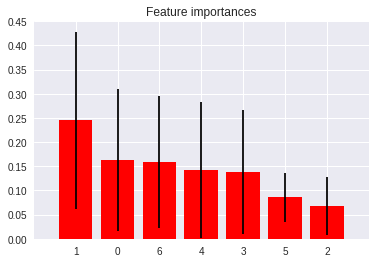

In [57]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# load the seeds dataset
target = seeds_data['VarietyType']
features = seeds_data.drop(['VarietyType'], axis=1)
feature_names = ["Area","Perimeter","Compactness","KernelLength","KernelWidth","AsymmetryCoefficient","KernelGrooveLength"]


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100, random_state=0)

forest.fit(features, target)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print('Feature names:',feature_names)
print(' ')

print("Feature ranking:")

for f in range(features.shape[1]):
   print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
      color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

Final Model Choice: Model_5b: VarietyType= 1+ Area + Perimeter + Groovelength. 
BIC: 27.357053
Accuracy: 0.919048

I chose this using a combination of the BIC, Accuracy, and feature selection rankings. With the BIC it continued to lower at every step of the backward selection, however, I don't feel that having only feature would be the best model. Using the extra trees classifier, the top three ranked features were Area, Perimeter, and Groovelength, which corresponded to the mid_BIC ranked model 5b. Although its accuracy wasnt the highest, it was very close to the highest, so with this combination of methods, I believe it to be the best model.